In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

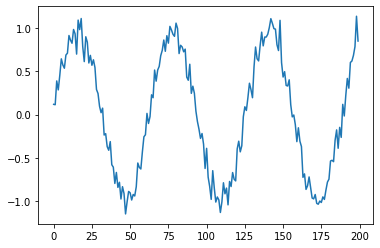

In [26]:
# Make the Original Data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1

#Ploting the data
plt.plot(series)
plt.show()

In [27]:
#Build the dataset
#Let's see if we can use T past values to predict the next values

T = 10
X = []
Y = []

for t in range(len(series) -  T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X Shape: ", X.shape, "Y Shape: ", Y.shape)

X Shape:  (190, 10) Y Shape:  (190,)


In [28]:
type(Y)

numpy.ndarray

In [29]:
#Try autoregressive linear model

i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [30]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/80
3/3 [==============================] - 0s 32ms/step - loss: 0.5656 - val_loss: 0.5973
Epoch 2/80
3/3 [==============================] - 0s 7ms/step - loss: 0.5497 - val_loss: 0.5817
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.5357 - val_loss: 0.5670
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 0.5230 - val_loss: 0.5529
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.5100 - val_loss: 0.5397
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.4977 - val_loss: 0.5273
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.4871 - val_loss: 0.5156
Epoch 8/80
3/3 [==============================] - 0s 7ms/step - loss: 0.4756 - val_loss: 0.5049
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.4657 - val_loss: 0.4948
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.4571 - val_loss: 0.4853
Epoch 11/80
3/3 [=====================

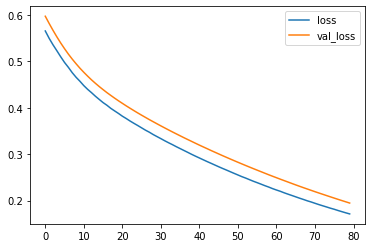

In [31]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [32]:
#Wrong forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

#Index of First validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  #Update the predictions list
  validation_predictions.append(p)

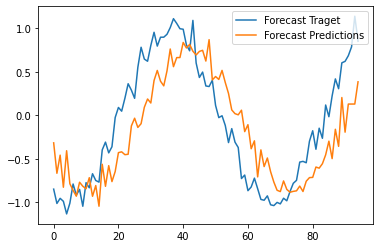

In [33]:
plt.plot(validation_target, label='Forecast Traget')
plt.plot(validation_predictions, label='Forecast Predictions')
plt.legend()

In [34]:
#Forecast Future values (use only self predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]

  #Update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

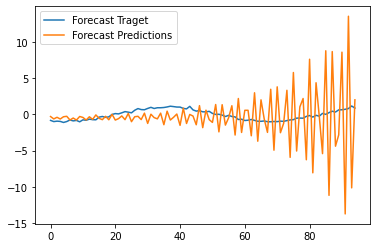

In [35]:
plt.plot(validation_target, label='Forecast Traget')
plt.plot(validation_predictions, label='Forecast Predictions')
plt.legend()